<a href="https://colab.research.google.com/github/addomaks/EDA-US-accidents/blob/main/US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANAYSIS : US ACCIDENT 2016-2021

In [ ]:
pip install opendatasets --upgrade -q

In [ ]:
import pandas as pd
import numpy as np
import opendatasets as od
from matplotlib import pyplot as plt
import seaborn
import folium

In [ ]:
 url="https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents"
od.is_kaggle_url('https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents')
od.download_kaggle_dataset(url, data_dir="./")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adnansherwani
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:02<00:00, 135MB/s]


In [ ]:
df = pd.read_csv("us-accidents/US_Accidents_Dec21_updated.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

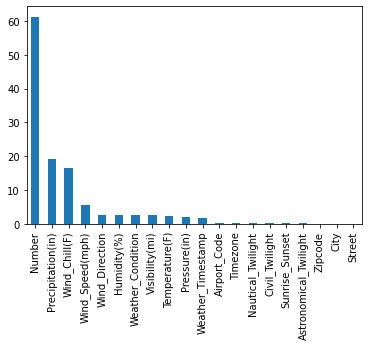

In [ ]:
missing_values = df.isna().sum().sort_values(ascending=False) * 100/len(df)
                                                                 
missing_values[missing_values != 0].plot(kind='bar')

### Exploratory Analysis on columns:

1. Start Time
2. City
3. County
4. State
5. Start Lat
6. Start Long

In [ ]:
df_states = df.groupby(['State']).count().sort_values(by=['ID'], ascending=False)[['ID']]

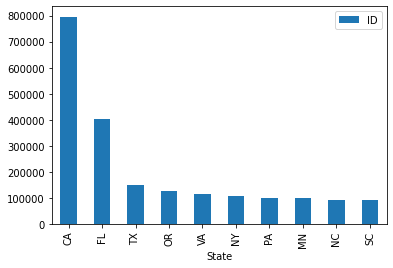

In [ ]:
df_states.head(10).plot(kind='bar')


In [ ]:
'County' in df.columns

True

In [ ]:
df_county = df['County'].value_counts()

In [ ]:
len(df['County'].unique())

1707

In [ ]:
df_county

Los Angeles            234122
Miami-Dade             143939
Orange                 114917
San Bernardino          55018
Dallas                  50050
                        ...  
Kearney                     1
Matagorda                   1
Oglala Lakota               1
St John The Baptist         1
Ness                        1
Name: County, Length: 1707, dtype: int64

In [ ]:
df_count_state = df.groupby(['State','County']).count().sort_values(['ID'], ascending=False)['ID'].reset_index()

In [ ]:
df_count_state.groupby('State').head(3).sort_values(['State', 'ID'], ascending=[True, False]).reset_index()[:20]

,index,State,County,ID
0,128,AL,Jefferson,4558
1,204,AL,Tuscaloosa,2441
2,239,AL,Montgomery,1970
3,140,AR,Pulaski,4215
4,514,AR,Crittenden,561
5,538,AR,Saline,493
6,12,AZ,Maricopa,33539
7,35,AZ,Pima,14190
8,238,AZ,Yavapai,1988
9,0,CA,Los Angeles,234122


In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

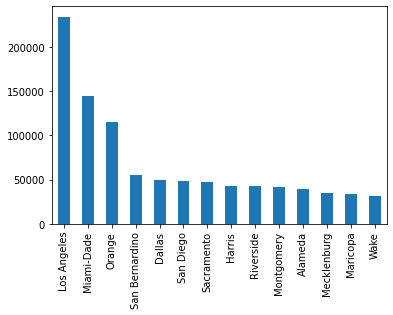

In [ ]:
df_county[df_county >= 30000].plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


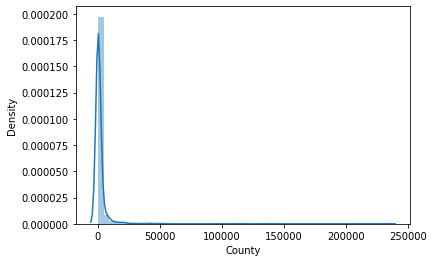

In [ ]:
seaborn.distplot(df_county)

In [ ]:
city_count = df[['City', 'State']].value_counts()

In [ ]:
city_count[:100]

City         State
Miami        FL       106896
Los Angeles  CA        68956
Orlando      FL        54654
Dallas       TX        41615
Houston      TX        39366
                       ...  
Orange       CA         3593
Columbus     OH         3550
Ogden        UT         3542
Bend         OR         3540
Frederick    MD         3524
Length: 100, dtype: int64

In [ ]:
cc =city_count[:100].groupby(['State']).sum().sort_values(ascending=False).head(20)

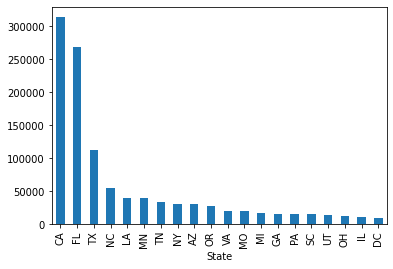

In [ ]:
cc.plot(kind='bar')

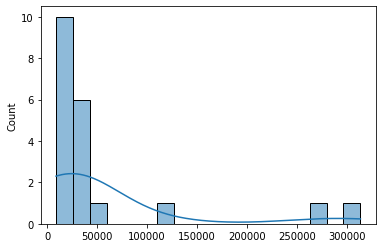

In [ ]:
seaborn.histplot(cc,legend=True, kde=True)

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
dhour = df['Start_Time'].dt.hour

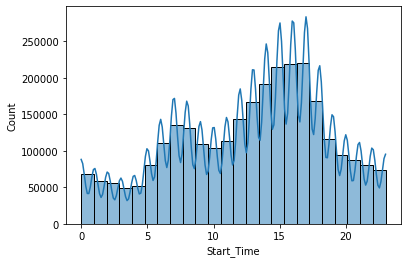

In [ ]:
seaborn.histplot(dhour, bins=24, kde=True)

In [ ]:
df['year'] = df['Start_Time'].dt.year

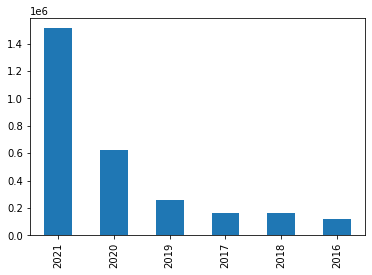

In [ ]:
df['year'].value_counts().plot(kind='bar')

In [ ]:
year_2021 = df[df['year'] == 2021]

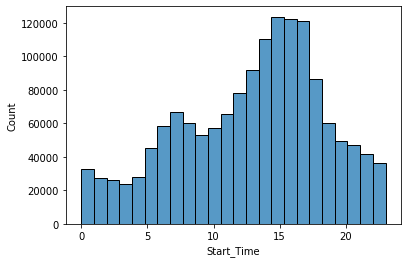

In [ ]:
seaborn.histplot(year_2021['Start_Time'].dt.hour, kde=False, bins=24)

In [ ]:
year_2016 =df[df['year'] == 2016]

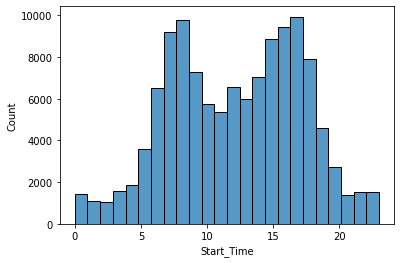

In [ ]:
seaborn.histplot(year_2016['Start_Time'].dt.hour, kde=False, bins=24)

In [ ]:
year_2019 = df[df['year'] == 2019]

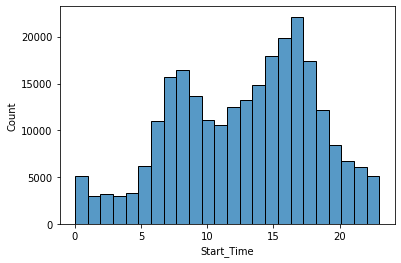

In [ ]:
seaborn.histplot(year_2019['Start_Time'].dt.hour, kde=False, bins=24)

In [ ]:
(len(year_2016)/ len(df)) * 100

4.288553010499265

In [ ]:
year_2020 = df[df['year'] == 2020]

In [ ]:
len(year_2020)/len(df)

0.21996090452395528

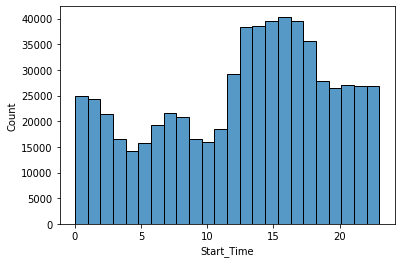

In [ ]:
seaborn.histplot(year_2020['Start_Time'].dt.hour, kde=False, bins=24)

In [ ]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

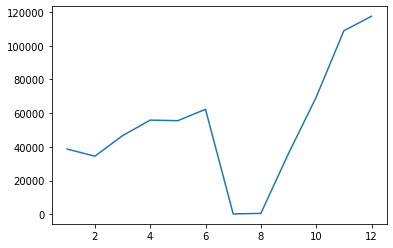

In [ ]:
x_2020 = year_2020.groupby([year_2020['Start_Time'].dt.month]).count()[['ID']].reset_index()
xx_2020 = x_2020['Start_Time']
yy_2020 = x_2020['ID']
plt.plot(xx_2020, yy_2020)

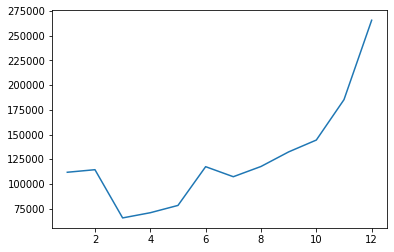

In [ ]:
x_2021 = year_2021.groupby([year_2021['Start_Time'].dt.month]).count()[['ID']].reset_index()
xx_2021 = x_2021['Start_Time']
yy_2021 = x_2021['ID']
plt.plot(xx_2021, yy_2021)

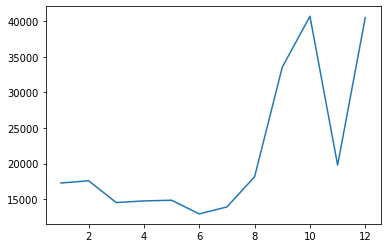

In [ ]:
x_2019 = year_2019.groupby([year_2019['Start_Time'].dt.month]).count()['ID'].reset_index()
xx_2019 = x_2019['Start_Time']
yy_2019 = x_2019['ID']
plt.plot(xx_2019, yy_2019)

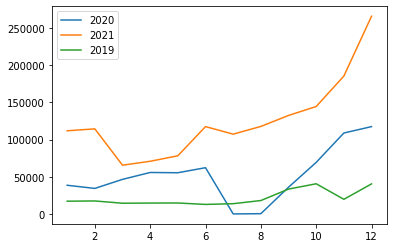

In [ ]:
plt.plot(xx_2020, yy_2020, label = "2020")
plt.plot(xx_2021, yy_2021, label = "2021")
plt.plot(xx_2019, yy_2019, label= '2019')
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'year'],
      dtype='object')

In [ ]:
type(df['Start_Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df['month_year'] = df['Start_Time'].dt.to_period('M')

In [ ]:
df['month_year']

0          2016-02
1          2016-02
2          2016-02
3          2016-02
4          2016-02
            ...   
2845337    2019-08
2845338    2019-08
2845339    2019-08
2845340    2019-08
2845341    2019-08
Name: month_year, Length: 2845342, dtype: period[M]

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'year', 'month_year'],
      dtype='object')

In [ ]:
df_data = df.groupby(df['month_year']).count()[['ID']].reset_index()

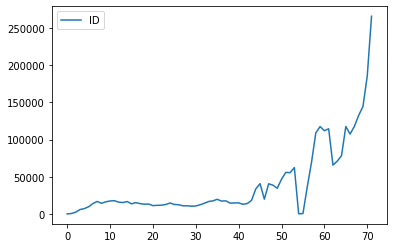

In [ ]:
df_data.plot(kind='line')

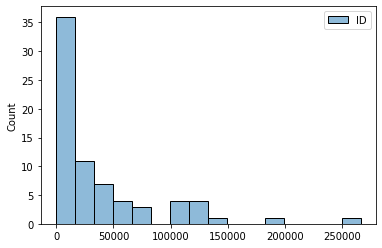

In [ ]:
seaborn.histplot(df_data)

In [ ]:
year_2021[['Start_Lat', 'Start_Lng' ]]

,Start_Lat,Start_Lng
224945,42.382359,-71.022318
224946,40.908676,-123.707116
224947,38.970628,-77.116333
224948,47.642651,-122.318590
224949,37.419536,-122.090640
...,...,...
2068385,33.932945,-118.280711
2068522,34.172340,-118.532685
2068635,44.069885,-121.306432
2068931,37.998126,-121.811133


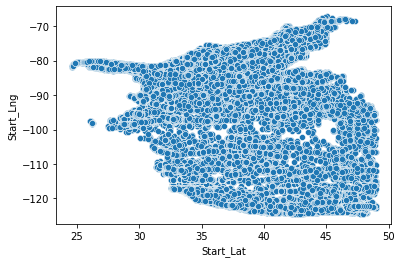

In [ ]:
seaborn.scatterplot(x=df['Start_Lat'], y=df['Start_Lng'])

In [ ]:
target = [year_2021['Start_Lat'], year_2021['Start_Lng']]
for ind, mpd in target():
  folium.Map(location=[ind[target['Start_Lng']], mpd[target['Start_Lat']]], zoom_start=8, tiles = "OpenStreetMap")
  folium.Marker(target, popup="<i>US accident site</i>").add_to(mapp)
mapp

TypeError: ignored

In [ ]:
year_2021['Start_Lat'][224945]

42.382359

In [ ]:
df.columns

NameError: ignored